In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

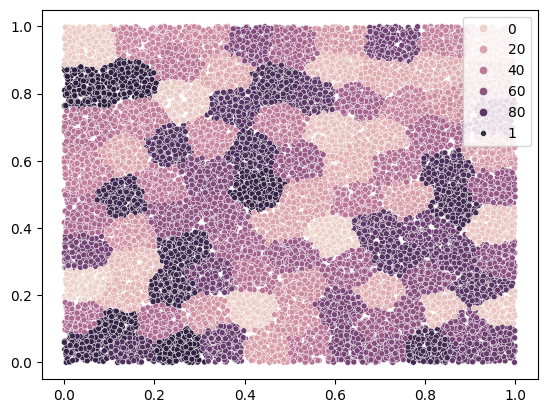

In [26]:
labels_means = []
class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X, fully_vectorized=False):
        # Randomly initialize cluster centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Assign each data point to the nearest centroid
            labels = self._assign_labels(X)
            
            # Update cluster centroids
            new_centroids = self._update_centroids(X, labels, fully_vectorized)
            
            # Check for convergence
            if np.allclose(new_centroids, self.centroids):
                break
            
            self.centroids = new_centroids

        return self._assign_labels(X)

                
    def _assign_labels(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)
    
    def _update_centroids(self, X, labels, fully_vectorized=False):
        new_centroids = np.empty_like(self.centroids)
        
        if not fully_vectorized:
            for i in range(self.n_clusters):
                new_centroids[i] = np.mean(X[labels == i], axis=0)
        else:
            labels = labels[:,None] == np.arange(self.n_clusters)
            labels = labels.astype(int)
            clusters_amounts = np.sum(labels, axis=0)
            a = X[:,:,None] * labels[:,None,:]
            sum1 = np.sum(a, axis=0)
            mean_of_clusters = sum1/clusters_amounts
            new_centroids = mean_of_clusters.T

        return new_centroids
    
# Example usage
np.random.seed(42)
X = np.random.rand(1000, 2)

kmeans = KMeans(n_clusters=100)
labels = kmeans.fit(X, fully_vectorized=True)



sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels,size=1)
plt.show()

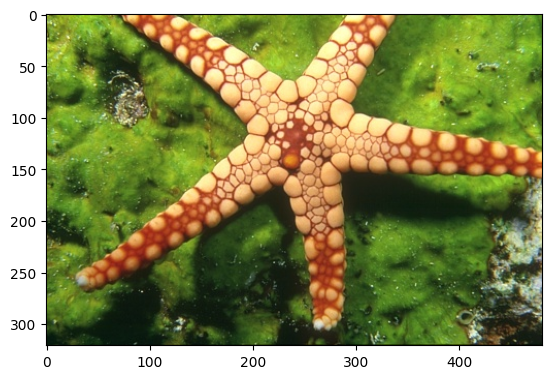

In [49]:
image_original = cv2.imread("star.jpg")
image_original  = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image_original)
plt.show()

In [50]:
X = image_original.reshape(-1,3).copy()

kmeans = KMeans(n_clusters=2,)
labels = kmeans.fit(X)

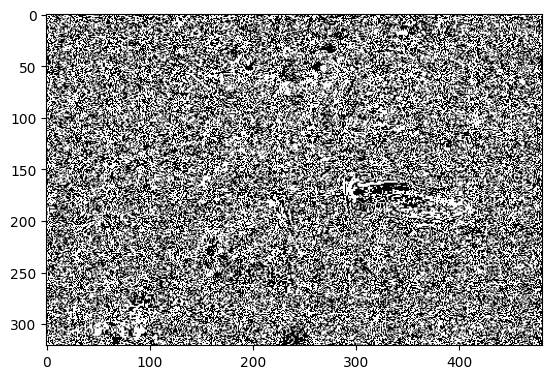

In [52]:
plt.imshow(image_original)
P = X.copy()
P[labels==0] = np.array([0,0,0])
P[labels==1] = np.array([255,255,255])
plt.imshow(P.reshape(image_original.shape))

In [226]:
import numpy as np

class AgglomerativeClustering:
    def __init__(self, n_clusters=2, linkage='single'):
        self.n_clusters = n_clusters
        self.linkage = linkage

    def fit_predict(self, X):
        # Initialize clusters as singletons
        clusters = [[i] for i in range(len(X))]

        while len(clusters) < self.n_clusters:
            n = len(clusters)
            distances = np.zeros((n,n))
            for i in range(n):
                for j in range(n):
                    pass
            

    def compute_distance(self, cluster1, cluster2):
        if self.linkage == 'single':
            return self.single_linkage(cluster1, cluster2)
        elif self.linkage == 'complete':
            return self.complete_linkage(cluster1, cluster2)
        elif self.linkage == 'average':
            return self.average_linkage(cluster1, cluster2)
        else:
            raise ValueError("Linkage type not supported.")

    def single_linkage(self, cluster1, cluster2):
        return np.min(np.linalg.norm(cluster1[:, np.newaxis] - cluster2, axis=2))

    def complete_linkage(self, cluster1, cluster2):
        return np.max(np.linalg.norm(cluster1[:, np.newaxis] - cluster2, axis=2))

    def average_linkage(self, cluster1, cluster2):
        return np.mean(np.linalg.norm(cluster1[:, np.newaxis] - cluster2, axis=2))

# Example usage:
# Generate some random data
np.random.seed(0)
X = np.random.rand(10, 2)

# Initialize and fit AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X)

print("Cluster labels:", labels)


Cluster labels: [0 0 0 0 0 0 0 0 1 2]


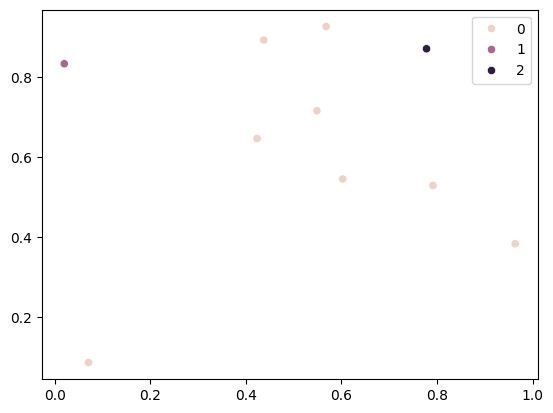

In [232]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=labels)
plt.show()